In [40]:
!pip install pyshp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as cm
import seaborn as sb
%matplotlib inline

You are using pip version 19.0.3, however version 19.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


## Goal of analysis:

We are aiming to get an overview of the performance and patterns of AirBnb operations in one of the most fast-paced cities in the world, New York.

### Let's first do some initial exploratory analysis

In [41]:
# Read in data, 
data = pd.read_csv("AB_NYC_2019.csv")
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [42]:
# Show all features
data.columns.values


array(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'], dtype=object)

In [43]:
# number of unique hosts
print("Number of unique hosts:", len(data["host_id"].unique()))

# Number of listings total
print("Number of listings total:", len(data))

# Number of features
print("Number of features:", len(data.columns.values))


Number of unique hosts: 37457
Number of listings total: 48895
Number of features: 16


['Private room' 'Entire home/apt' 'Shared room']


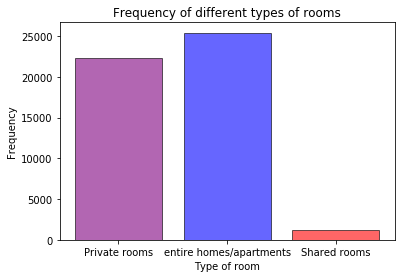

In [44]:
# Plot distribution of listing prices by the type of room it is

# Get unique types of rooms 
print(data["room_type"].unique())

x1 = data.loc[data.room_type=="Private room", "price"]
x2 = data.loc[data.room_type=="Entire home/apt", "price"]
x3 = data.loc[data.room_type=="Shared room", "price"]

# Bar plot of the frequency counts
plt.bar(x=["Private rooms", "entire homes/apartments", "Shared rooms"], height=[len(x1), len(x2), len(x3)], color=["purple", "blue", "red"] , edgecolor="black", alpha=0.6)
plt.title("Frequency of different types of rooms")
plt.xlabel("Type of room")
plt.ylabel("Frequency")
plt.show()


#### Counts of the different types of rooms

So, we can see that the dataset is dominated with Private rooms and entire homes listings. This essentially shows that owners of these listings are seeing that there is more success inr rooms with more privacy (not surprising!)

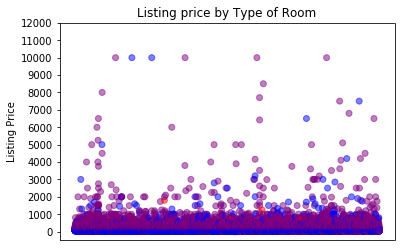

In [45]:
# Map type of listing to colors
dict_cols = {"Private room": "blue", "Entire home/apt": "purple", "Shared room": "red"}
col_list = [dict_cols[type_room] for type_room in data["room_type"]]

# Scatter plot showing distribution of price in relation to type of room
plt.scatter([i for i in range(len(data))], data["price"], c=col_list, alpha=0.5)
plt.title("Listing price by Type of Room")
plt.yticks([i for i in range(0, 13000, 1000)])
plt.xticks([])
plt.ylabel("Listing Price")
plt.show()

#### Listing price by the type of room it is 

We can see that the majority of airbnb listings price value lies in the range of 0 to 1000. There are relatively few above the 2000 mark, and even though there are more "Entire house" listings overall, there seems to be more "Private Room" (purple) listings above the 2000 mark.

['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']


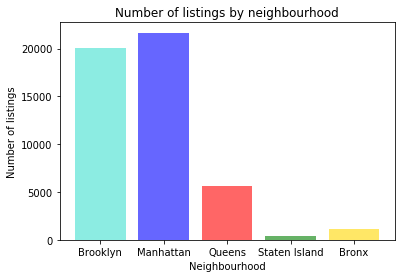

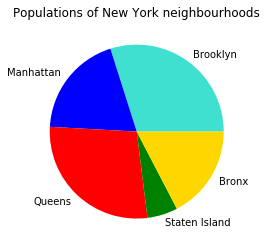

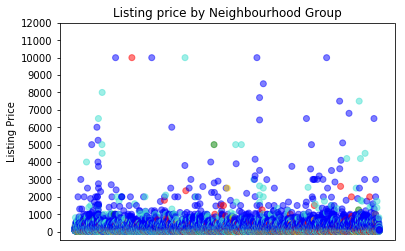

In [46]:
# Lets see with neighoburhood group now
unique_neighbourhoods = list(data["neighbourhood_group"].unique())
print(unique_neighbourhoods)

# assign colors for plotting
dict_col = {"Brooklyn": "turquoise", "Queens": "red", "Staten Island": "green", "Bronx": "gold", "Manhattan": "blue"}
col_list = [dict_col[neighbourhood] for neighbourhood in data["neighbourhood_group"]]
color_list = ["turquoise", "blue", "red", "green", "gold"]

list_ng = list(data["neighbourhood_group"])

list_counts = [list_ng.count("Brooklyn"), list_ng.count("Manhattan"), list_ng.count("Queens"), list_ng.count("Staten Island"),
    list_ng.count("Bronx")]

# Plot frequency counts
plt.bar(x=unique_neighbourhoods, height=list_counts, color=color_list, alpha=0.6)
plt.xlabel("Neighbourhood")
plt.ylabel("Number of listings")
plt.title("Number of listings by neighbourhood")
plt.show()

# Pie chart showing populations (gathered 10/12/2019)
populations = [2533000, 1629000, 2359000, 479458, 1471000]

plt.pie(populations, labels=unique_neighbourhoods, colors=color_list)
plt.title("Populations of New York neighbourhoods")
plt.show()

# Scatter to show prices
plt.scatter([i for i in range(len(data))], data["price"], c=col_list, alpha=0.5)
plt.title("Listing price by Neighbourhood Group")
plt.yticks([i for i in range(0, 13000, 1000)])
plt.xticks([])
plt.ylabel("Listing Price")
plt.show()

#### Summarising the plots

The most interesting insight to gather here is when we compare the Bronx and Queens to Manhattan and Brooklyn. We see that even though populations are quite similar between all 4 New York neighbourhoods, there is a large difference in the number of AirBnb listings between the pairs. Cultural, environmental, economic or geographic reasons could be at play here to produce these results.  



#### Zooming in....

I want to have a better look at the meat of the scatter plot, that is, listings where the price ranges from 0 to 500. Lets look at some stats...

In [47]:
# Mean? STD?
print("Mean price of a listing: $" + str(data["price"].mean()))
print("Standard Deviation of the price a listing: $" + str(data["price"].std()))


Mean price of a listing: $152.7206871868289
Standard Deviation of the price a listing: $240.15416974718727


The mean price is all the way down at 152. The range interestingly is $10,000, which is our highest priced listing, meaning that there are listings with a price of 0. 

let's do some pre-processing for a more "focused" analysis, we want to get into the meat of the data:
    - We'll treat 0$ listings as errors and remove them
    - We'll get rid of outliers for now. How do we determine outliers? 
        - We'll see what a boxplot can show us, we'll get IQR, Range, etc...
    - We'll plot our processed data and perform some more analysis

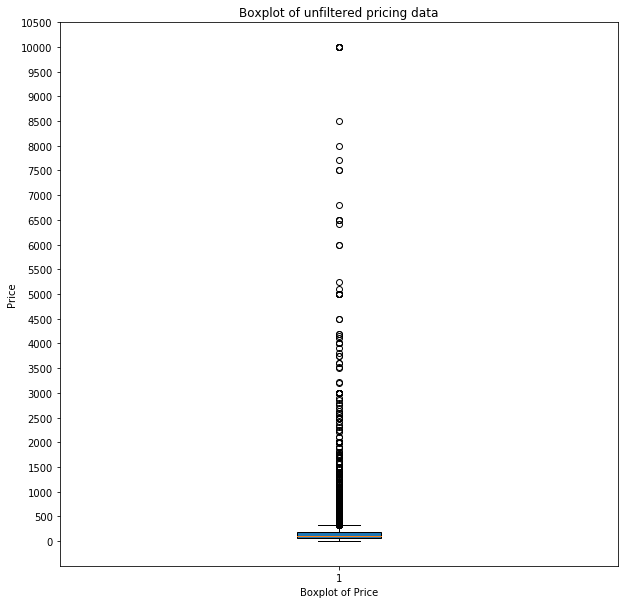

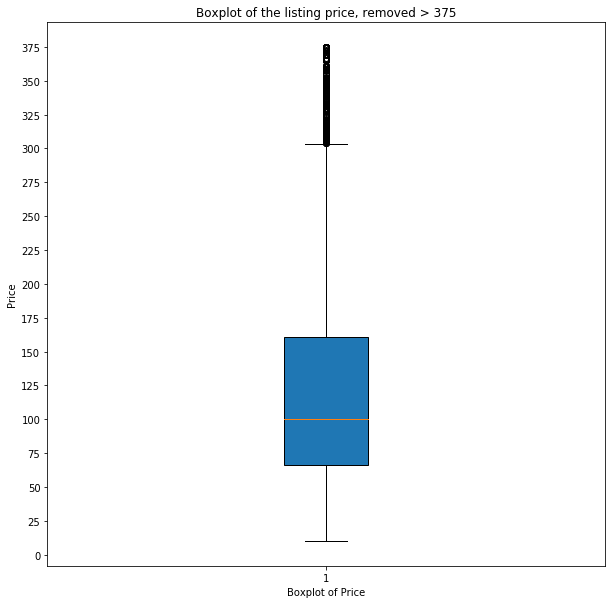

Mean price of a listing: $123.55290534308574
Standard Deviation of the price a listing: $73.42245502390233


In [48]:
# Keep an original shallow copy of dataFrame
copy_df = data.copy()

# Lets look at boxplot of original data
plt.figure(figsize=(10, 10))
bp1 = plt.boxplot(x=data["price"], patch_artist=True)
plt.title("Boxplot of unfiltered pricing data")
plt.xlabel("Boxplot of Price")
plt.ylabel("Price")
plt.yticks([i for i in range(0, 11000, 500)])
plt.show()

# Lets process a bit, to get to the meat of the data

# Remove rows that have price of zero
copy_df.drop(copy_df[copy_df.price == 0].index, inplace=True)

# Remove "outliers" ($375 and above, based on plot)
plt.figure(figsize=(10, 10))
copy_df.drop(copy_df[copy_df.price>375].index, inplace=True)
bp2 = plt.boxplot(x=copy_df["price"], patch_artist=True)
plt.title("Boxplot of the listing price, removed > 375")
plt.xlabel("Boxplot of Price")
plt.ylabel("Price")
plt.yticks([i for i in range(0, 400, 25)])
plt.show()

print("Mean price of a listing: $" + str(copy_df["price"].mean()))
print("Standard Deviation of the price a listing: $" + str(copy_df["price"].std()))


#### First boxplot

This shows the unfiltered data, showing that there is quite a spread of "flier" points (outliers) ranging from around 250-400 ish to 10,000. We can use this to set a cut off point so we can look at the spread of the data without these outliers. We can make some observations about the flier datapoints in that it seems to be quite condensed in the 300 to 1000 price range (but not enough for it to be considered part of the whiskers interestingly). We also see the spread of the points increase as we head to higher prices. This is expected, as higher priced goods are in most cases rarer than lower priced goods. 

#### Second Boxplot

This second boxplot shows the filtered data with houses priced at 0 and at 375 and above eliminated. This plot shows how densely the prices are for NYC airbnb listings, where 50% of the listings lie in between a price of 70 and 160 (IQR approx = 90). We also see that the Upper Quartile(top whisker) range is quite large showing 25% of the listings lie quite spread out (Upper Quartile range approx = 160 to 320 = 160). The bulk of the data is incredibly far from our overall maximum (10,000), causing outliers to be labeled from any listing above 320 in price upwards.  

#### We'll continue this analysis!